# Лабораторная работа №1. Основы работы с библиотеками Gym, Tensorflow и PyTorch

In [ ]:
!pip install -q swig
# !pip install -q gym
!pip install -q gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.9 MB/s eta 0:00:00


# Задание 1  
Создать среду Taxi-v3, отобразить кадры среды, значение временного шага, код
состояния, код действия, значение вознаграждения для 10 случайных действий

In [3]:
# import gym
import gymnasium as gym

In [4]:
env = gym.make("Taxi-v3", render_mode="ansi")

state, info = env.reset()
steps_data = []

for step in range(10):
    action = env.action_space.sample()
    next_state, reward, done, truncated, info = env.step(action)

    print(f"Step: {step + 1}")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Done: {done}")
    print(f"State:\n{env.render()}")
    print("-" * 12)

    state = next_state

    if done:
        state, info = env.reset()
        break

env.close()


Step: 1
Action: 2
Reward: -1
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

------------
Step: 2
Action: 5
Reward: -10
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

------------
Step: 3
Action: 5
Reward: -10
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

------------
Step: 4
Action: 5
Reward: -10
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

------------
Step: 5
Action: 5
Reward: -10
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

------------
Step: 6
Action: 0
Reward: -1
Done: False
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

------------
Step: 7
Action: 1
Reward: -1
Done: False
State:
+----

# Задание 2
Используя библиотеку tensorflow, создайте, обучите и оцените свою модель,
используя датасет, отличный от MNIST

In [5]:
import tensorflow as tf
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data = load_wine()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(len(np.unique(y)), activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/step - accuracy: 0.3674 - loss: 1.1304 - val_accuracy: 0.2759 - val_loss: 1.1490
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5368 - loss: 0.9760 - val_accuracy: 0.4828 - val_loss: 0.9540
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7398 - loss: 0.8842 - val_accuracy: 0.7586 - val_loss: 0.8052
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8519 - loss: 0.7858 - val_accuracy: 0.8966 - val_loss: 0.6954
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8615 - loss: 0.7158 - val_accuracy: 0.8966 - val_loss: 0.6053
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8759 - loss: 0.6685 - val_accuracy: 0.9310 - val_loss: 0.5285
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9198 - loss: 0.5831 - val_accuracy: 0.9655 - val_loss: 0.4631
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9136 - loss: 0.5309 - val_accuracy: 0.9655 - val_loss: 0.4102
Epo

Test Accuracy: 0.9167


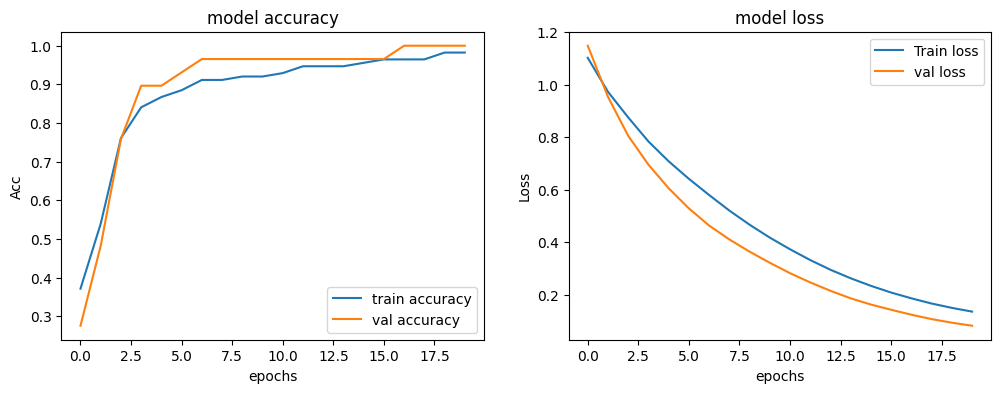

In [10]:
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.title('model accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('model loss')
plt.legend()

plt.show()

# Задание 3
1. Самостоятельно изучить функции библиотеки PyTorch для Python:
https://pytorch.org/get-started/locally/, https://pytorch.org/docs/stable/index.html
2. Используя библиотеку pytorch, повторить создание, обучение и оценку модели
из Задания №2

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [12]:
data = load_wine()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(X_test, y_test)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [13]:
class WineModel(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(WineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели, функции потерь и оптимизатора
input_size = X.shape[1]
hidden1, hidden2 = 64, 32
output_size = len(data.target_names)

model = WineModel(input_size, hidden1, hidden2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
num_epochs = 20
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == batch_y).sum().item()
        total_train += batch_y.size(0)

    avg_train_loss = epoch_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)
    train_accuracy_history.append(correct_train / total_train)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_outputs = model(val_X)
            loss = criterion(val_outputs, val_y)
            val_loss += loss.item()
            _, predicted = torch.max(val_outputs, 1)
            correct_val += (predicted == val_y).sum().item()
            total_val += val_y.size(0)
    avg_val_loss = val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)
    val_accuracy_history.append(correct_val / total_val)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy_history[-1]:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy_history[-1]:.4f}")


model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)

Epoch [1/20], Train Loss: 1.1076, Train Acc: 0.2676, Val Loss: 1.0312, Val Acc: 0.3889
Epoch [2/20], Train Loss: 1.0084, Train Acc: 0.5775, Val Loss: 0.9303, Val Acc: 0.7500
Epoch [3/20], Train Loss: 0.9090, Train Acc: 0.8521, Val Loss: 0.8173, Val Acc: 0.8333
Epoch [4/20], Train Loss: 0.7917, Train Acc: 0.9437, Val Loss: 0.6857, Val Acc: 0.9444
Epoch [5/20], Train Loss: 0.6614, Train Acc: 0.9507, Val Loss: 0.5529, Val Acc: 0.9444
Epoch [6/20], Train Loss: 0.5237, Train Acc: 0.9859, Val Loss: 0.4253, Val Acc: 0.9722
Epoch [7/20], Train Loss: 0.3960, Train Acc: 0.9859, Val Loss: 0.3188, Val Acc: 0.9722
Epoch [8/20], Train Loss: 0.2931, Train Acc: 0.9859, Val Loss: 0.2376, Val Acc: 1.0000
Epoch [9/20], Train Loss: 0.2148, Train Acc: 0.9859, Val Loss: 0.1797, Val Acc: 1.0000
Epoch [10/20], Train Loss: 0.1580, Train Acc: 0.9859, Val Loss: 0.1437, Val Acc: 0.9722
Epoch [11/20], Train Loss: 0.1185, Train Acc: 0.9930, Val Loss: 0.1216, Val Acc: 0.9722
Epoch [12/20], Train Loss: 0.0916, Train 

Test Accuracy: 0.9444


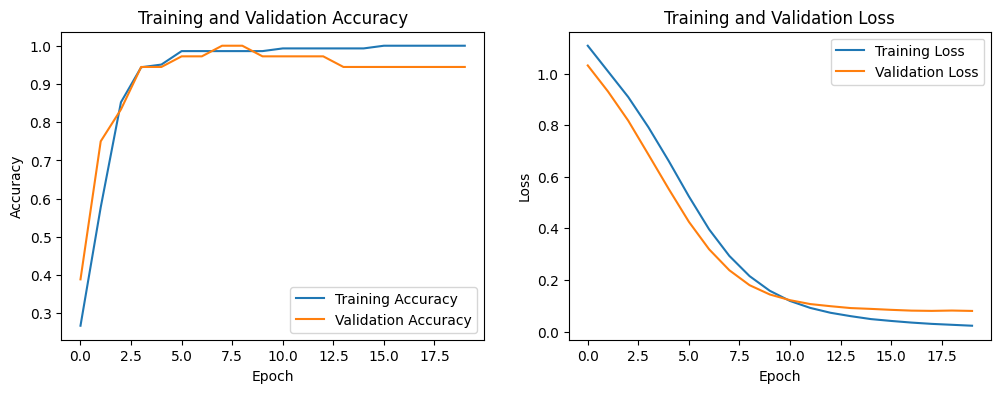

In [15]:
print(f"Test Accuracy: {accuracy:.4f}")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# plt.tight_layout()
plt.show()